In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ins=pd.read_csv('insurance.csv')
ins.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


# PERFORMING EDA

In [3]:
#creating a data frame
ins=pd.DataFrame(ins)

In [4]:
ins.shape
#1000 rows and 40 columns

(1000, 40)

In [5]:
ins
#some of the columns have data missing or irrelevant input

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [6]:
#data needs to be normalised
#this is a logistic regression problem

In [7]:
#to find the type of the dataset
type(ins)

#the dataset type is data frame

pandas.core.frame.DataFrame

In [8]:
ins.info()
#It gives the information about the data that there are total 1000 rows and 40 columns.
#The data types used are int64, float64 & object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [9]:
#checking for null values
ins.isnull().sum()

#there are no null values in the columns- except the column- _c39 , hence we can drop this column

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [10]:
#displaying entire data
pd.set_option('display.max_columns', None)
ins

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [11]:
#dropping blank column
ins = ins.drop(['_c39'], axis= 1)
ins

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [12]:
#in the columns we can see the "?", we can replace it with a value - "Not Given"
ins['police_report_available'] = ins['police_report_available'].replace(to_replace='?', value='Not Given')
ins['collision_type'] = ins['collision_type'].replace(to_replace='?', value='Not Given')
ins['property_damage'] = ins['property_damage'].replace(to_replace='?', value='Not Given')
ins

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,Not Given,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,Not Given,0,0,Not Given,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,Not Given,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,Not Given,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,Not Given,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,Not Given,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,Not Given,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,Not Given,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [13]:
#dropping columns:
ins = ins.drop(['policy_csl'], axis= 1)

In [14]:
#using ordinal encoder for dates
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(ins[["incident_date"]])
ins[["incident_date"]] = enc.transform(ins[["incident_date"]])

In [15]:
enc.fit(ins[["policy_bind_date"]])
ins[["policy_bind_date"]] = enc.transform(ins[["policy_bind_date"]])

In [16]:
ins

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532.0,OH,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,49.0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,821.0,IN,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,41.0,Vehicle Theft,Not Given,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,Not Given,0,0,Not Given,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,186.0,OH,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,44.0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,766.0,IL,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,19.0,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,Not Given,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,181.0,IL,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,34.0,Vehicle Theft,Not Given,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487.0,OH,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,44.0,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,Not Given,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,129.0,IL,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,47.0,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,Not Given,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,509.0,OH,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,45.0,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,Not Given,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,573.0,IL,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,52.0,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,Not Given,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [17]:
#since the location is all different - we can probably drop this column
ins['incident_location'].value_counts()

9935 4th Drive         1
4214 MLK Ridge         1
8548 Cherokee Ridge    1
2352 MLK Drive         1
9734 2nd Ridge         1
                      ..
6770 1st St            1
4119 Texas St          1
4347 2nd Ridge         1
1091 1st Drive         1
1416 Cherokee Ridge    1
Name: incident_location, Length: 1000, dtype: int64

In [18]:
ins = ins.drop (["incident_location"], axis = 1)

In [19]:
#using label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [20]:
columns= ["policy_state", "insured_sex", "insured_education_level", "insured_occupation", "insured_hobbies", "insured_relationship", "incident_type", "incident_type", "incident_severity", "authorities_contacted", "incident_state", "incident_city", "property_damage", "police_report_available", "auto_make", "auto_model", "fraud_reported", "collision_type"]
for i in columns:
    ins[i] = le.fit_transform(ins[i])

In [21]:
ins

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532.0,2,1000,1406.91,0,466132,1,4,2,17,0,53300,0,49.0,2,3,0,4,4,1,5,1,2,1,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,821.0,1,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,41.0,3,1,1,4,5,5,8,1,1,0,0,1,5070,780,780,3510,8,12,2007,1
2,134,29,687698,186.0,2,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,44.0,0,2,1,4,1,1,7,3,0,2,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,766.0,0,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,19.0,2,0,0,4,2,0,5,1,1,1,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,181.0,0,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,34.0,3,1,1,2,1,0,20,1,0,0,1,0,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487.0,2,1000,1310.80,0,431289,0,5,2,13,4,0,0,44.0,2,0,1,1,0,4,20,1,2,0,1,1,87200,17440,8720,61040,6,6,2006,0
996,285,41,186934,129.0,0,1000,1436.79,0,608177,0,6,9,17,5,70900,0,47.0,2,2,0,1,4,3,23,1,2,2,3,1,108480,18080,18080,72320,13,28,2015,0
997,130,34,918516,509.0,2,500,1383.49,3000000,442797,0,5,1,3,2,35100,0,45.0,0,3,1,4,0,0,4,3,1,2,3,2,67500,7500,7500,52500,11,19,1996,0
998,458,62,533940,573.0,0,2000,1356.92,5000000,441714,1,0,5,0,5,0,0,52.0,2,2,0,3,1,0,2,1,1,0,1,2,46980,5220,5220,36540,1,5,1998,0


In [22]:
ins.shape

(1000, 37)

<AxesSubplot:>

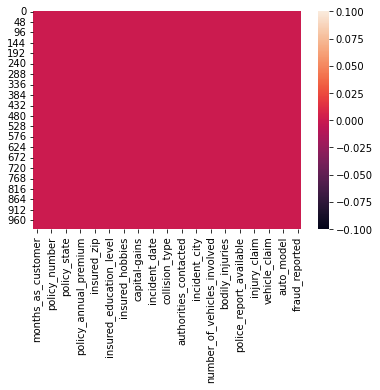

In [23]:
#plotting null values via graph
sns.heatmap(ins.isnull())

#there are no more null values

In [24]:
ins.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,474.332000,1.01400,1136.000000,1256.406150,1.101000e+06,501214.488000,0.463000,2.966000,6.653000,9.731000,2.416000,25126.100000,-26793.700000,29.376000,1.172000,1.590000,1.184000,2.167000,3.242000,2.966000,11.644000,1.83900,0.964000,0.992000,1.487000,0.971000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,275.402851,0.83096,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,1.948497,4.019048,5.674049,1.681003,27872.187708,28104.096686,17.249875,1.081474,1.141579,0.939695,1.532142,2.155942,2.044266,6.951373,1.01888,0.799589,0.820127,1.111335,0.810442,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,100804.000000,0.000000,0.00000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-111100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,233.750000,0.00000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,1.000000,3.000000,5.000000,1.000000,0.000000,-51500.000000,14.750000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,6.000000,1.00000,0.000000,0.000000,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,472.500000,1.00000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,3.000000,7.000000,10.000000,2.000000,0.000000,-23250.000000,29.500000,1.000000,2.000000,1.000000,2.000000,4.000000,3.000000,12.000000,1.00000,1.000000,1.000000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,713.250000,2.00000,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,5.000000,10.000000,15.000000,4.000000,51025.000000,0.000000,44.000000,2.000000,3.000000,2.000000,4.000000,5.000000,5.000000,17.000000,3.00000,2.000000,2.000000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,950.000000,2.00000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,6.000000,13.000000,19.000000,5.000000,100500.000000,0.000000,59.000000,3.000000,3.000000,3.000000,4.000000,6.000000,6.000000,23.000000,4.00000,2.000000,2.000000,3.000000,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


In [25]:
#Finding correlation values
ins.corr()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.057555,0.055055,-0.000328,0.026807,0.005018,0.015498,0.017895,0.060925,-0.000833,0.009814,-0.093661,0.069727,0.006399,0.020209,-0.002985,-0.017377,-0.065432,-0.059581,0.010021,0.005369,-0.000130,0.070639,0.014736,0.002309,-0.010162,0.058383,-0.055712,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,0.059413,0.056538,-0.014533,0.029188,0.014404,0.018126,0.025604,0.073337,0.000969,0.017220,-0.081315,0.074832,-0.007075,0.007368,0.002416,-0.025626,-0.071117,-0.058439,0.015417,0.005770,-0.002291,0.087161,0.022102,-0.004365,-0.015679,0.052359,-0.049797,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_number,0.057555,0.059413,1.000000,0.045713,0.072815,-0.006738,0.022566,0.008968,0.007083,0.004564,-0.037264,-0.014422,0.039896,0.017120,0.009802,-0.005669,0.053022,0.001742,-0.007371,-0.015719,0.018565,-0.010064,-0.035406,0.000113,0.013432,-0.039998,-0.004558,-0.012661,0.021592,-0.018009,-0.008762,-0.010678,-0.020184,0.023860,0.065240,-0.000183,-0.029443
policy_bind_date,0.055055,0.056538,0.045713,1.000000,0.015289,-0.001721,-0.037733,-0.024866,-0.042749,0.039338,0.040606,0.006720,0.020085,0.017710,-0.004535,-0.026123,0.008022,0.000164,-0.008332,-0.055760,-0.032065,0.043035,0.034437,-0.012582,-0.002381,-0.016492,-0.046970,-0.007004,0.015045,0.015901,0.024160,0.008611,0.013784,-0.025955,0.000306,0.035067,0.060642
policy_state,-0.000328,-0.014533,0.072815,0.015289,1.000000,0.010033,0.012455,-0.029580,0.008777,-0.020481,-0.034327,-0.031215,-0.038689,-0.018506,0.074551,-0.030338,0.027287,0.031848,0.057763,-0.026377,-0.016777,0.008723,-0.002077,0.029457,-0.042263,-0.023346,0.013384,0.022960,0.046682,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_deductable,0.026807,0.029188,-0.006738,-0.001721,0.010033,1.000000,-0.003245,0.010870,0.004545,-0.009733,0.015217,-0.046733,0.004061,-0.022945,0.035212,-0.023544,-0.024055,-0.038411,-0.054085,-0.015711,-0.000760,0.006517,-0.045117,0.060935,0.051214,0.010017,-0.022765,0.066639,0.035213,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.022566,-0.037733,0.012455,-0.003245,1.000000,-0.006247,0.032354,0.038853,-0.019715,0.035922,-0.018019,0.001925,-0.013738,0.023547,0.028257,0.053603,0.037877,-0.011155,-0.055191,0.046434,0.048724,-0.001578,-0.045991,0.042314,0.026780,0.002332,0.024188,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,0.008968,-0.024866,-0.029580,0.010870,-0.006247,1.000000,0.019671,0.010688,-0.019357,0.023422,-0.037000,0.077495,-0.047268,-0.024056,-0.009471,0.015966,-0.003279,0.009466,0.029044,-0.077492,0.013094,-0.023257,-0.021270,-0.073762,0.022743,-0.006738,-0.021005,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622
insured_zip,0.017895,0.025604,0.007083,-0.042749,0.008777,0.004545,0.032354,0.019671,1.000000,-0.036942,0.016079,-0.069077,0.002106,-0.002355,0.006303,0.049372,0.027113,-0.010840,-0.028082,-0.023855,-0.017548,-0.047669,-0.017532,0.008274,0.027448,-0.020153,0.028695,0.019805,0.034523,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368
insured_sex,0.060925,0.073337,0.004564,0.039338,-0.020481,-0.009733,0.038853,0.010688,-0.036942,1.000000,0.009002,-0.006160,-0.020317,0.002

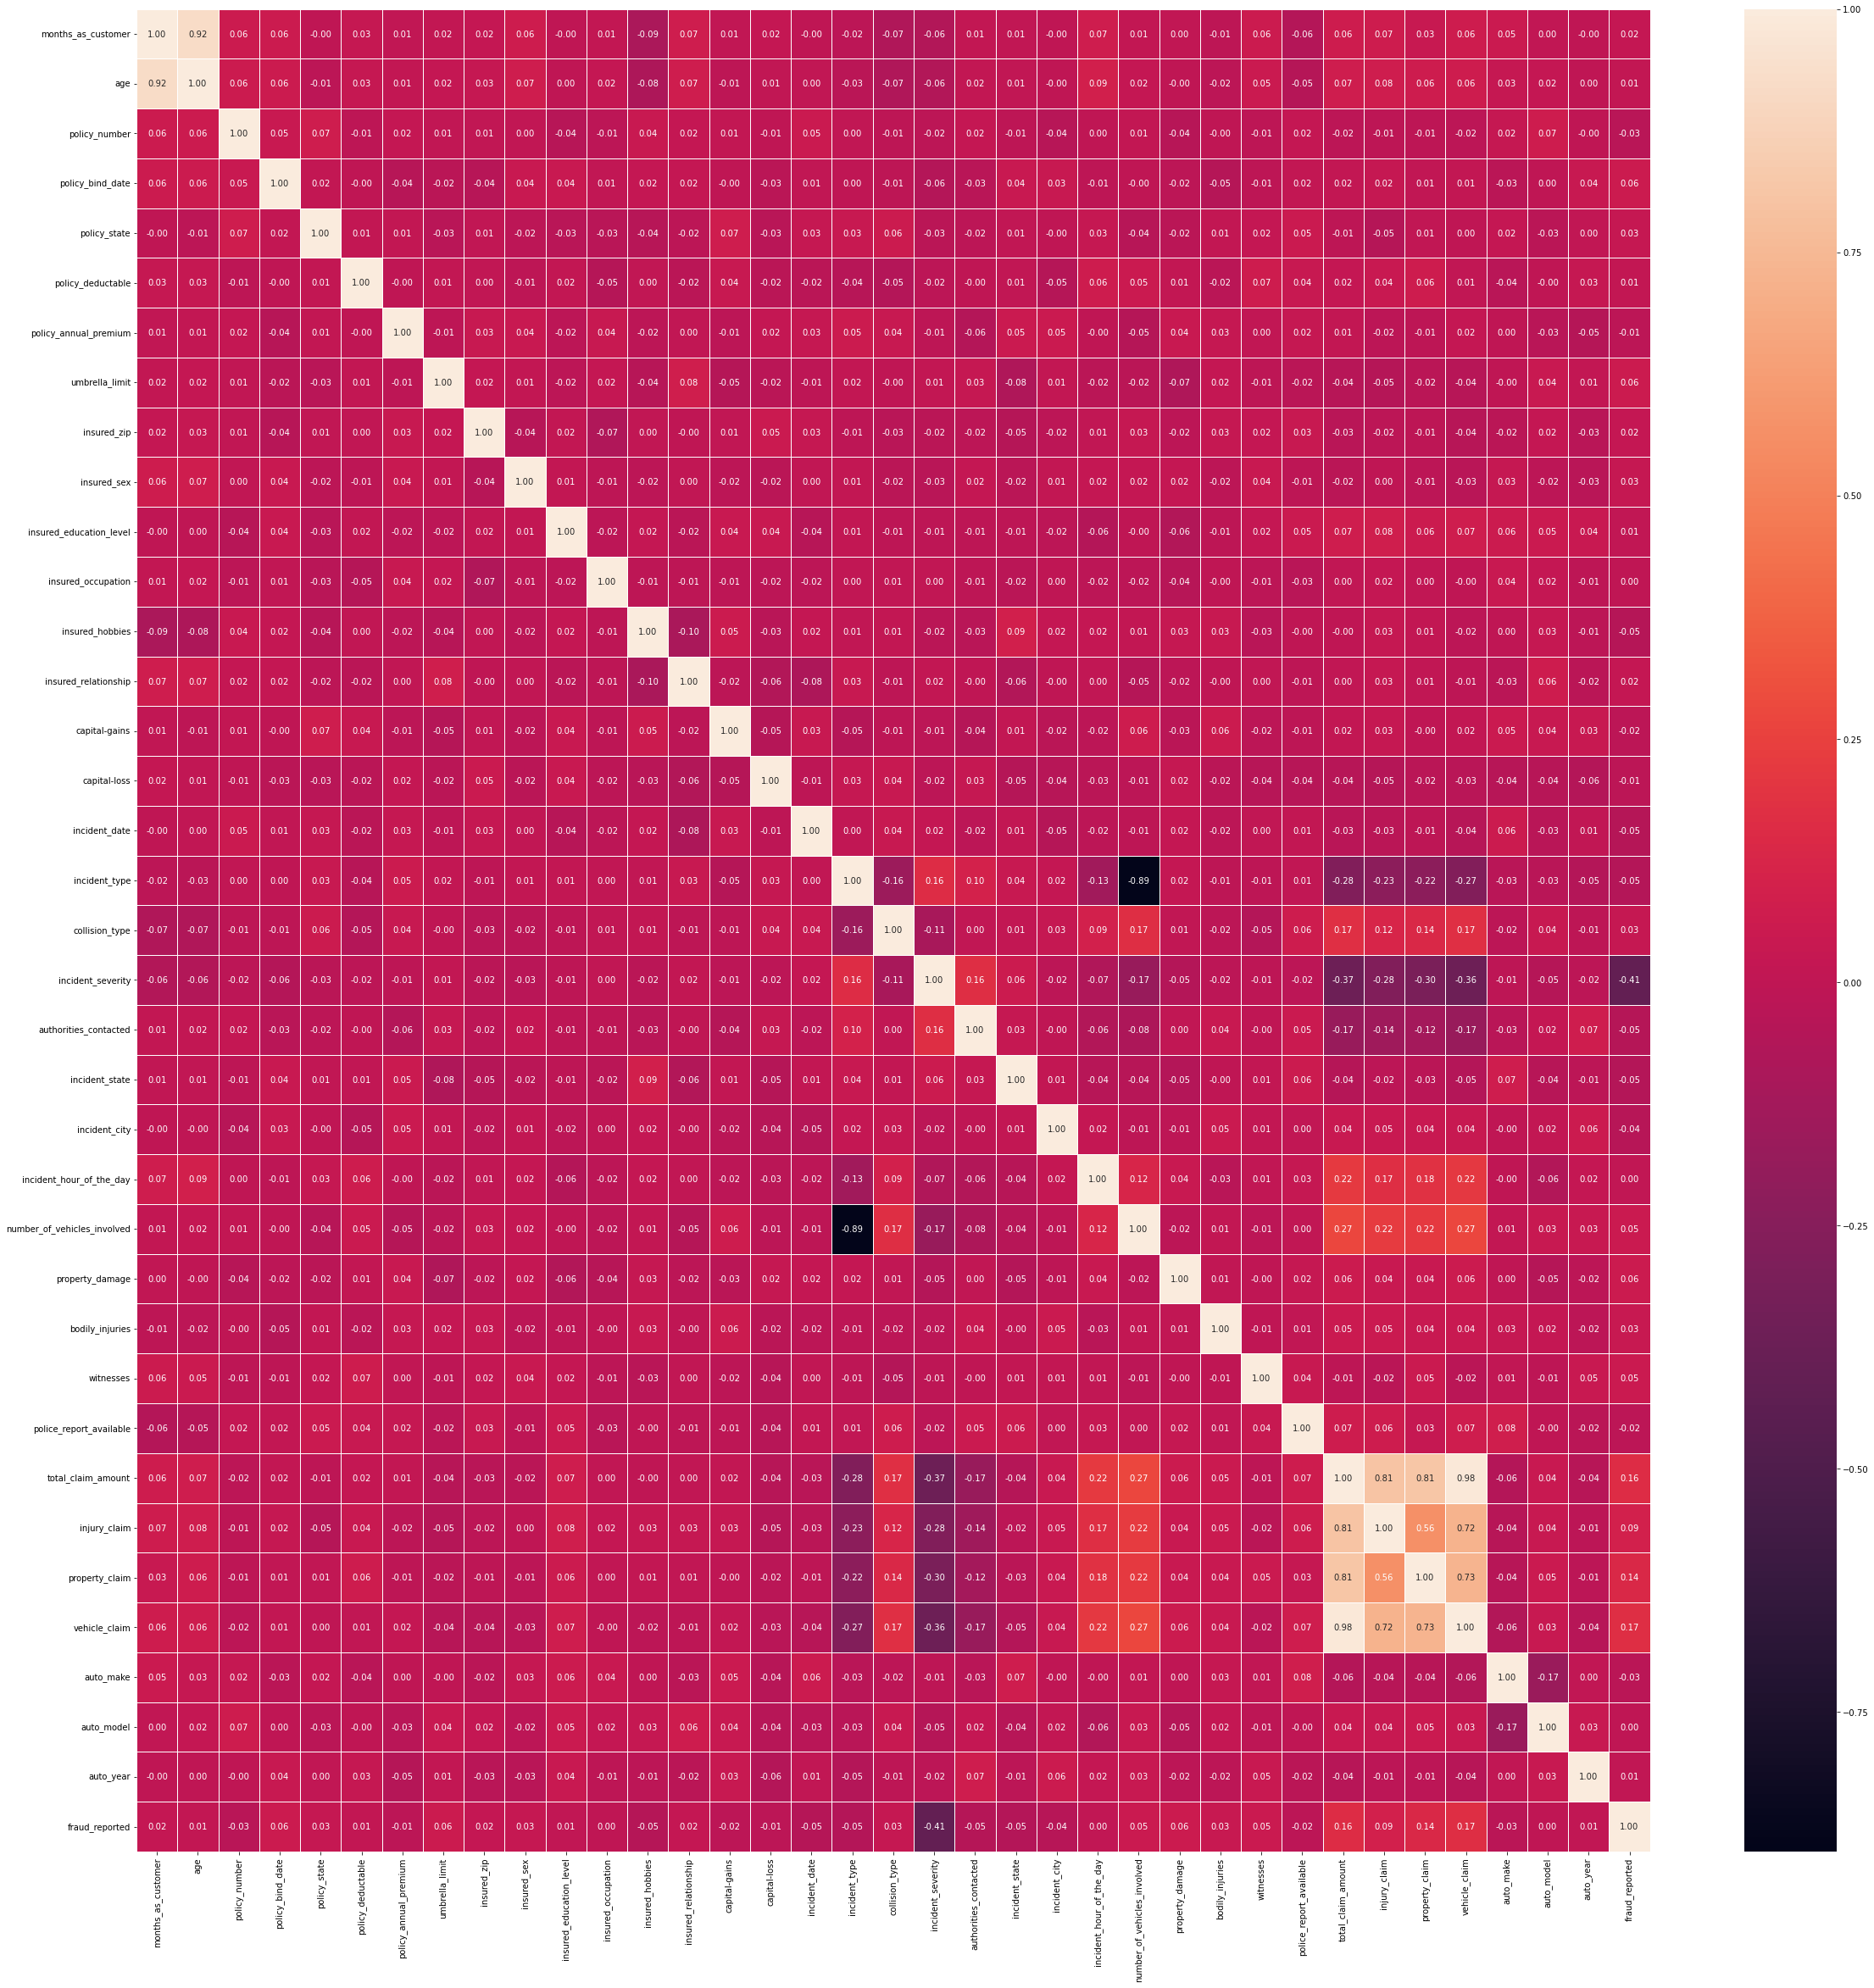

In [26]:
#heatmap for correlation
corr_hmap= ins.corr()
plt.figure(figsize=(40,40))
sns.heatmap(corr_hmap, annot=True, linewidths=0.9, linecolor="white", fmt='.2f')
plt.show()

In [27]:
#making correlation matrix with 'fraud_reported'
corr_matrix= ins.corr()
corr_matrix['fraud_reported'].sort_values(ascending=False)

#the highest correlation with the target variable is of following columns:
#incident_city                 -0.040403
#authorities_contacted         -0.045802
#insured_hobbies               -0.046838
#incident_date                 -0.047726
#incident_type                 -0.050376
#incident_state                -0.051407
#incident_severity             -0.405988
#vehicle_claim                  0.170049
#total_claim_amount             0.163651

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
injury_claim                   0.090975
policy_bind_date               0.060642
property_damage                0.060616
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
collision_type                 0.031032
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
insured_zip                    0.019368
policy_deductable              0.014817
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
auto_model                     0.000720
policy_annual_premium         -0.014480


In [28]:
ins.shape

(1000, 37)

months_as_customer                AxesSubplot(0.125,0.787927;0.110714x0.0920732)
age                            AxesSubplot(0.257857,0.787927;0.110714x0.0920732)
policy_number                  AxesSubplot(0.390714,0.787927;0.110714x0.0920732)
policy_bind_date               AxesSubplot(0.523571,0.787927;0.110714x0.0920732)
policy_state                   AxesSubplot(0.656429,0.787927;0.110714x0.0920732)
policy_deductable              AxesSubplot(0.789286,0.787927;0.110714x0.0920732)
policy_annual_premium             AxesSubplot(0.125,0.677439;0.110714x0.0920732)
umbrella_limit                 AxesSubplot(0.257857,0.677439;0.110714x0.0920732)
insured_zip                    AxesSubplot(0.390714,0.677439;0.110714x0.0920732)
insured_sex                    AxesSubplot(0.523571,0.677439;0.110714x0.0920732)
insured_education_level        AxesSubplot(0.656429,0.677439;0.110714x0.0920732)
insured_occupation             AxesSubplot(0.789286,0.677439;0.110714x0.0920732)
insured_hobbies             

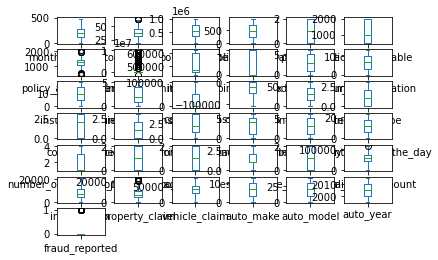

In [29]:
#checking for outliers
#plotting the plot all together
ins.plot(kind='box', subplots=True, layout=(7,6))

In [30]:
#Removing outliers
from scipy.stats import zscore
z=np.abs(zscore(ins))
z.shape

(1000, 37)

In [31]:
threshold=3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 7,  7,  7,  7,  7,  6,  6,  7,  7,  7,  7, 31,  7,  7,  7,  6, 15,
        7,  7,  7], dtype=int64))


In [32]:
#total number of outliers presnt are:
len(np.where(z>3)[0])

#there are total 20 outliers present- not much outliers

20

In [33]:
#dropping the outliers
ins_new=ins[(z<3).all(axis=1)]
ins_new

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532.0,2,1000,1406.91,0,466132,1,4,2,17,0,53300,0,49.0,2,3,0,4,4,1,5,1,2,1,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,821.0,1,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,41.0,3,1,1,4,5,5,8,1,1,0,0,1,5070,780,780,3510,8,12,2007,1
2,134,29,687698,186.0,2,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,44.0,0,2,1,4,1,1,7,3,0,2,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,766.0,0,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,19.0,2,0,0,4,2,0,5,1,1,1,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,181.0,0,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,34.0,3,1,1,2,1,0,20,1,0,0,1,0,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487.0,2,1000,1310.80,0,431289,0,5,2,13,4,0,0,44.0,2,0,1,1,0,4,20,1,2,0,1,1,87200,17440,8720,61040,6,6,2006,0
996,285,41,186934,129.0,0,1000,1436.79,0,608177,0,6,9,17,5,70900,0,47.0,2,2,0,1,4,3,23,1,2,2,3,1,108480,18080,18080,72320,13,28,2015,0
997,130,34,918516,509.0,2,500,1383.49,3000000,442797,0,5,1,3,2,35100,0,45.0,0,3,1,4,0,0,4,3,1,2,3,2,67500,7500,7500,52500,11,19,1996,0
998,458,62,533940,573.0,0,2000,1356.92,5000000,441714,1,0,5,0,5,0,0,52.0,2,2,0,3,1,0,2,1,1,0,1,2,46980,5220,5220,36540,1,5,1998,0


In [34]:
print("old data frame ", ins.shape)
print("new data frame ", ins_new.shape)
print("total dropped rows ", ins.shape[0]- ins_new.shape[0])

old data frame  (1000, 37)
new data frame  (980, 37)
total dropped rows  20


In [35]:
#data loss percent
loss_percent = ((1000-980)/1000)*100
loss_percent

#2.0 % data is removed after removing outliers

2.0

In [36]:
#checking for skewness
ins_new.skew().sort_values(ascending=False)

#the maximum skewness in present in columns:
#umbrella_limit                 1.801424
#fraud_reported                 1.188267
#insured_zip                    0.837283
#number_of_vehicles_involved    0.509725
#policy_deductable              0.476090
#capital-loss                  -0.376884
#total_claim_amount            -0.593593
#vehicle_claim                 -0.620936

umbrella_limit                 1.801424
fraud_reported                 1.188267
insured_zip                    0.837283
number_of_vehicles_involved    0.509725
policy_deductable              0.476090
age                            0.475385
capital-gains                  0.466619
months_as_customer             0.362608
property_claim                 0.361356
incident_severity              0.277726
injury_claim                   0.271759
insured_sex                    0.139324
incident_type                  0.090563
insured_relationship           0.078339
property_damage                0.058818
police_report_available        0.054188
incident_city                  0.043882
policy_number                  0.036283
policy_annual_premium          0.035964
witnesses                      0.026211
policy_bind_date               0.006386
insured_education_level        0.006286
bodily_injuries                0.003757
incident_date                  0.002604
auto_make                     -0.028739


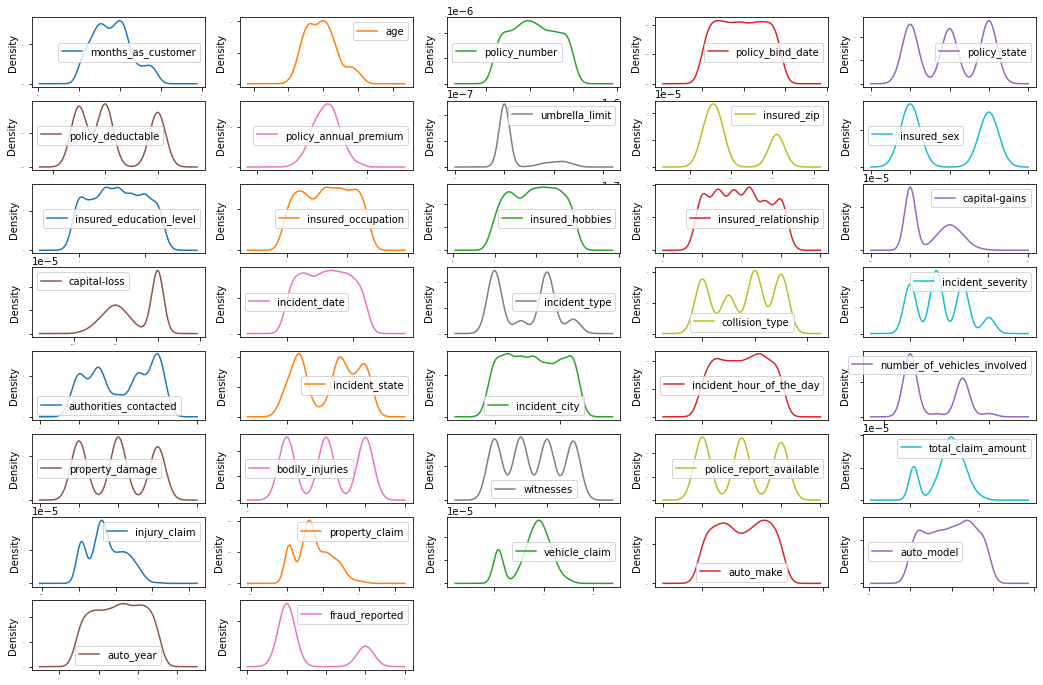

In [37]:
#show skewness using the plot
ins_new.plot(kind='density', subplots=True, layout=(8,5), sharex= False, legend= True, fontsize=1, figsize=(18,12))
plt.show()

In [38]:
#Separating Input & output variables
ins_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532.0,2,1000,1406.91,0,466132,1,4,2,17,0,53300,0,49.0,2,3,0,4,4,1,5,1,2,1,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,821.0,1,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,41.0,3,1,1,4,5,5,8,1,1,0,0,1,5070,780,780,3510,8,12,2007,1
2,134,29,687698,186.0,2,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,44.0,0,2,1,4,1,1,7,3,0,2,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,766.0,0,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,19.0,2,0,0,4,2,0,5,1,1,1,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,181.0,0,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,34.0,3,1,1,2,1,0,20,1,0,0,1,0,6500,1300,650,4550,0,31,2009,0


In [39]:
ins_new.shape

(980, 37)

In [40]:
x= ins_new.iloc[:,0:36]
x

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,328,48,521585,532.0,2,1000,1406.91,0,466132,1,4,2,17,0,53300,0,49.0,2,3,0,4,4,1,5,1,2,1,2,2,71610,6510,13020,52080,10,1,2004
1,228,42,342868,821.0,1,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,41.0,3,1,1,4,5,5,8,1,1,0,0,1,5070,780,780,3510,8,12,2007
2,134,29,687698,186.0,2,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,44.0,0,2,1,4,1,1,7,3,0,2,3,0,34650,7700,3850,23100,4,30,2007
3,256,41,227811,766.0,0,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,19.0,2,0,0,4,2,0,5,1,1,1,2,0,63400,6340,6340,50720,3,34,2014
4,228,44,367455,181.0,0,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,34.0,3,1,1,2,1,0,20,1,0,0,1,0,6500,1300,650,4550,0,31,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487.0,2,1000,1310.80,0,431289,0,5,2,13,4,0,0,44.0,2,0,1,1,0,4,20,1,2,0,1,1,87200,17440,8720,61040,6,6,2006
996,285,41,186934,129.0,0,1000,1436.79,0,608177,0,6,9,17,5,70900,0,47.0,2,2,0,1,4,3,23,1,2,2,3,1,108480,18080,18080,72320,13,28,2015
997,130,34,918516,509.0,2,500,1383.49,3000000,442797,0,5,1,3,2,35100,0,45.0,0,3,1,4,0,0,4,3,1,2,3,2,67500,7500,7500,52500,11,19,1996
998,458,62,533940,573.0,0,2000,1356.92,5000000,441714,1,0,5,0,5,0,0,52.0,2,2,0,3,1,0,2,1,1,0,1,2,46980,5220,5220,36540,1,5,1998


In [41]:
y= ins_new.iloc[:,36:]
y

#

,fraud_reported
0,1
1,1
2,0
3,1
4,0
...,...
995,0
996,0
997,0
998,0


C:\Users\kirti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

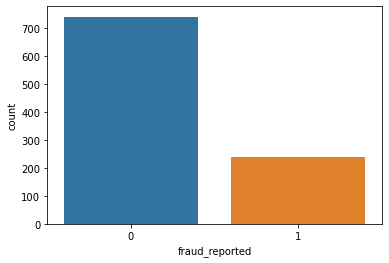

In [42]:
#data balancing
sns.countplot(ins_new['fraud_reported'])

In [43]:
#target data is not balanced hence performing data balancing
import sklearn

In [44]:
#checking sklearn version
sklearn.__version__

'1.0.2'

In [45]:
pip install --user imblearn

Note: you may need to restart the kernel to use updated packages.


In [46]:
from imblearn.over_sampling import SMOTE

In [47]:
smt = SMOTE()
x, y= smt.fit_resample(x, y)

In [48]:
x.value_counts()

months_as_customer  age  policy_number  policy_bind_date  policy_state  policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  insured_sex  insured_education_level  insured_occupation  insured_hobbies  insured_relationship  capital-gains  capital-loss  incident_date  incident_type  collision_type  incident_severity  authorities_contacted  incident_state  incident_city  incident_hour_of_the_day  number_of_vehicles_involved  property_damage  bodily_injuries  witnesses  police_report_available  total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  auto_model  auto_year
0                   32   740518         546.000000        2             1000               1377.040000            0               441363       1            1                        12                  0                5                     61400          -41100        33.000000      0              2               1                  0                      1               6              6

In [49]:
y.value_counts()

fraud_reported
0                 740
1                 740
dtype: int64

In [50]:
y

#Yes - 1
#No -0

,fraud_reported
0,1
1,1
2,0
3,1
4,0
...,...
1475,1
1476,1
1477,1
1478,1


In [51]:
##removing the skewness
from sklearn.preprocessing import power_transform
#doing power transform
x=power_transform(x, method='yeo-johnson')
x

C:\Users\kirti\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


array([[ 1.08428623,  1.05166634,  0.02562587, ...,  0.95250883,
        -1.92382811, -0.19067208],
       [ 0.29241509,  0.44986046, -0.70302533, ...,  0.48238732,
        -0.63345236,  0.34432687],
       [-0.56910044, -1.1922077 ,  0.62889883, ..., -0.55920074,
         1.03015052,  0.34432687],
       ...,
       [-0.67120531, -0.75982678, -1.64756292, ..., -0.85199617,
         0.85781397, -1.40431927],
       [-0.40116236, -0.62404929, -0.71003338, ..., -0.01763857,
         0.41585653, -0.71669129],
       [ 0.49159662,  0.55554662, -1.0199494 , ...,  0.72068467,
        -0.33376501, -0.71669129]])

In [52]:
#performing data scaling 
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
x= scale.fit_transform(x)

In [53]:
from sklearn.preprocessing import MinMaxScaler
scale= MinMaxScaler()
scaled=scale.fit_transform(x)
x=scaled
x

array([[0.7743959 , 0.7558449 , 0.55236482, ..., 0.81179651, 0.04202874,
        0.43606994],
       [0.60517184, 0.6439327 , 0.35048961, ..., 0.67842524, 0.38327505,
        0.58642243],
       [0.42106466, 0.33857269, 0.71950358, ..., 0.38293159, 0.82322315,
        0.58642243],
       ...,
       [0.3992447 , 0.41897851, 0.08880237, ..., 0.2998669 , 0.77764789,
        0.09499476],
       [0.45695328, 0.44422778, 0.34854801, ..., 0.53657024, 0.66077003,
        0.28824107],
       [0.64773723, 0.66358616, 0.26268475, ..., 0.74602909, 0.46252887,
        0.28824107]])

In [54]:
#number of columns
x.shape[1] 

36

In [55]:
#checking the multicollieanrity
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
#finding vif for each column
def calc_vif(x):
    vif= pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF Factor']= [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return(vif)

In [57]:
x.shape

(1480, 36)

In [58]:
calc_vif(ins_new)

#there is high multicolinearity in columns :
#longitude
#commissioning year
#geolocation source
#generation_gwh columns

#to remove the multicolinearity in various columns , instead of dropping the columns, we can use PCA

C:\Users\kirti\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF Factor
0,months_as_customer,28.577161
1,age,131.609899
2,policy_number,5.680200
3,policy_bind_date,4.072565
4,policy_state,2.599952
5,policy_deductable,4.649587
6,policy_annual_premium,29.070398
7,umbrella_limit,1.265009
8,insured_zip,51.839554
9,insured_sex,1.919870


In [59]:
#clubbing the columns to 33 total- clubbing pair of columns with high colinearity 
from sklearn.decomposition import PCA
pca= PCA(n_components = 33)
xpca=pca.fit_transform(x)
x=xpca

In [60]:
x=pd.DataFrame(x)
x.shape

(1480, 33)

In [61]:
y.shape

(1480, 1)

# Model Building - Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
lr= LogisticRegression()

In [65]:
#finding the best accuracy
best_accuracy=0
best_rs= 0
for i in range(1,1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.20, random_state=i)
    lr= LogisticRegression()
    lr.fit(x_train, y_train)
    pred_test= lr.predict(x_test)
    accuracy= accuracy_score(y_test, pred_test)
    if accuracy>best_accuracy:
        best_accuracy=accuracy
        best_rs=i
print("Best Accuracy is ", best_accuracy, "on random state ", best_rs)

#the best accuracy found at random state = 86

Best Accuracy is  0.875 on random state  49


In [66]:
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=.20, random_state=86)
lr.fit(x_train, y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)

In [67]:
from sklearn.metrics import classification_report
print("accuracy score:", accuracy_score(y_test, pred_test))
print(classification_report(y_test, pred_test))
#so at random state 975, the support tells the number of rows with 0 and 1 target variable, accuracy is 0.54 is not good

accuracy score: 0.875
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       158
           1       0.88      0.85      0.86       138

    accuracy                           0.88       296
   macro avg       0.88      0.87      0.87       296
weighted avg       0.88      0.88      0.87       296



In [68]:
#The model accuracy is 89 %

Cross Validating

In [69]:
#in this data is divided into 'n' folds for training and 1 fold goes for test
pred_lr = lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test, pred_test)
for j in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv: ", j)
    print("Cross validation is ", lsc*100)
    print("accuracy score is ", lss*100)
    print("\n")


At cv:  2
Cross validation is  79.52702702702703
accuracy score is  87.5


At cv:  3
Cross validation is  78.25084242827384
accuracy score is  87.5


At cv:  4
Cross validation is  80.60810810810811
accuracy score is  87.5


At cv:  5
Cross validation is  80.6081081081081
accuracy score is  87.5


At cv:  6
Cross validation is  80.54787531680985
accuracy score is  87.5


At cv:  7
Cross validation is  81.09087773533808
accuracy score is  87.5


At cv:  8
Cross validation is  81.14864864864866
accuracy score is  87.5


At cv:  9
Cross validation is  81.02734663710272
accuracy score is  87.5




In [70]:
#since the most matching value is at cv= 7, we take it
lsscore_selected= cross_val_score(lr,x,y,cv=7).mean()
print("the cv score is:", lsscore_selected, "the accuracy score is: ", lss)

the cv score is: 0.8109087773533808 the accuracy score is:  0.875


AUC- ROC Curve

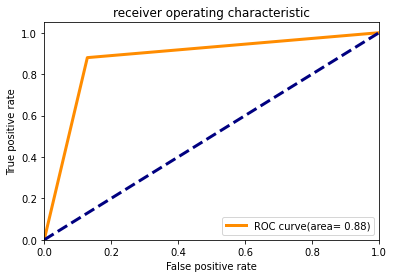

In [71]:
#plotting model performance
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve (pred_test, y_test)
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color = 'darkorange', lw=3, label= 'ROC curve(area= %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=3, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [72]:
#roc area shows that the accuracy is 89%. There are some values in false positive & false negative that reduce the accuracy

Saving the model

In [73]:
#saving Data Frame
project_ins=pd.DataFrame(pred_test)
project_ins.to_csv("poject_ins.csv")

In [74]:
#saving model
import pickle

file_ins = 'poject_ins.pkl'
pickle.dump(lr, open(file_ins, 'wb'))

In [75]:
#load model from disk
model_lr = pickle.load(open(file_ins, 'rb'))

In [76]:
#model prediction
result_lr = model_lr.score(x_test, y_test)
print(result_lr)

#Prediction is correct upto 87.5%

0.875


# Conclusion

The model shows the accuracy of 89% which is good accuracy

In [89]:
#predict 'Fraud' by giving inputs- 

t= np.array([200, 12, 454, 12, 47434, 45, 12, 40, 77, 66, 11, 36, 44, 10, 789,89,54,78,90,87,89,1,1,2,3,4,55,66,24,34,55,23,2])

In [90]:
t.shape

(33,)

In [91]:
t=t.reshape(1,-1)

In [92]:
t.shape

(1, 33)

In [93]:
lr.predict(t)

# Yes - 1
# No -0

array([1])

For the given values of the data, it says that there is Fraud Reported = Yes =1